In [1]:
# Vishakha Dixit
# 801265288
# HW-2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv('diabetes.csv')

X = dataset.iloc[:,0:8].values
Y = dataset.iloc[:,8].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [3]:
# Standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [4]:
# PROBLEM 1

In [5]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [6]:
Y_pred = classifier.predict(X_test)
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [7]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[79, 20],
       [18, 37]], dtype=int64)

In [8]:
AccuracyP1 = metrics.accuracy_score(Y_test, Y_pred)
PrecisionP1 = metrics.precision_score(Y_test, Y_pred)
RecallP1 = metrics.recall_score(Y_test, Y_pred)

#Getting the metrics for Logistic Regression
print("AccuracyP1: ", metrics.accuracy_score(Y_test, Y_pred)) 
print("PrecisionP1: ", metrics.precision_score(Y_test, Y_pred)) 
print("RecallP1: ", metrics.recall_score(Y_test, Y_pred))

AccuracyP1:  0.7532467532467533
PrecisionP1:  0.6491228070175439
RecallP1:  0.6727272727272727


Text(0.5, 257.44, 'Predicted label')

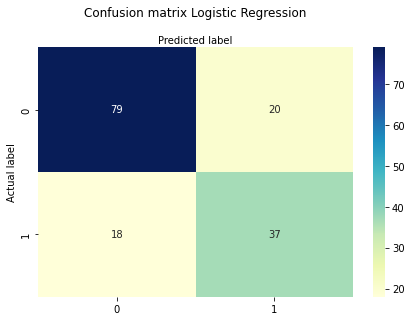

In [9]:
#Plotting the heat map for Logistic Regression 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [10]:
# PROBLEM 2

In [11]:
classifier2 = LogisticRegression(class_weight = 'balanced')
validationMetrics = {'accuracy': "accuracy", "precision": "precision", "recall": "recall"}

In [12]:
# K=5

cv_results = cross_validate(classifier2, X, Y, cv = 5, groups = None, scoring = validationMetrics)
cv_results

{'fit_time': array([0.01499915, 0.0150764 , 0.01900959, 0.01591873, 0.01407671]),
 'score_time': array([0.00099993, 0.00199533, 0.00199986, 0.00200009, 0.00200415]),
 'test_accuracy': array([0.74025974, 0.70779221, 0.74675325, 0.83660131, 0.75816993]),
 'test_precision': array([0.61290323, 0.56521739, 0.62295082, 0.73333333, 0.64285714]),
 'test_recall': array([0.7037037 , 0.72222222, 0.7037037 , 0.83018868, 0.67924528])}

In [13]:
#Scores for k-fold with k=5
print("K-fold with k=5")
print()

#Comparing results with Problem 1
print("Accuracy for Problem 1 = ", AccuracyP1, "vs \nAccuracy for Problem 2 = ", np.mean(cv_results['test_accuracy']))
print()
print("Precision for Problem 1 = ", PrecisionP1, "vs \nPrecision for Problem 2 = ", np.mean(cv_results['test_precision']))
print()
print("Recall for Problem 1 = ", RecallP1, "vs \nRecall for Problem 2 = ", np.mean(cv_results['test_recall']))

K-fold with k=5

Accuracy for Problem 1 =  0.7532467532467533 vs 
Accuracy for Problem 2 =  0.757915287327052

Precision for Problem 1 =  0.6491228070175439 vs 
Precision for Problem 2 =  0.6354523825946814

Recall for Problem 1 =  0.6727272727272727 vs 
Recall for Problem 2 =  0.727812718378756


In [14]:
# K=10

cv_results = cross_validate(classifier2, X, Y, cv = 10, groups = None, scoring = validationMetrics)
cv_results

{'fit_time': array([0.01702094, 0.01399946, 0.01599884, 0.01900411, 0.01399875,
        0.01408553, 0.0179286 , 0.01499987, 0.01800132, 0.01699829]),
 'score_time': array([0.0019803 , 0.00100017, 0.00100017, 0.00099683, 0.00100136,
        0.00098467, 0.00199986, 0.00099993, 0.00099969, 0.00099993]),
 'test_accuracy': array([0.67532468, 0.77922078, 0.74025974, 0.67532468, 0.75324675,
        0.74025974, 0.80519481, 0.84415584, 0.77631579, 0.76315789]),
 'test_precision': array([0.52777778, 0.69230769, 0.61290323, 0.52777778, 0.63333333,
        0.60606061, 0.71428571, 0.74193548, 0.63636364, 0.65384615]),
 'test_recall': array([0.7037037 , 0.66666667, 0.7037037 , 0.7037037 , 0.7037037 ,
        0.74074074, 0.74074074, 0.85185185, 0.80769231, 0.65384615])}

In [15]:
#Scores for k-fold with k=10
print("K-fold with k=10")
print()

#Comparing results with Problem 1
print("Accuracy for Problem 1 = ", AccuracyP1, "vs \nAccuracy for Problem 2 = ", np.mean(cv_results['test_accuracy']))
print()
print("Precision for Problem 1 = ", PrecisionP1, "vs \nPrecision for Problem 2 = ", np.mean(cv_results['test_precision']))
print()
print("Recall for Problem 1 = ", RecallP1, "vs \nRecall for Problem 2 = ", np.mean(cv_results['test_recall']))

K-fold with k=10

Accuracy for Problem 1 =  0.7532467532467533 vs 
Accuracy for Problem 2 =  0.7552460697197539

Precision for Problem 1 =  0.6491228070175439 vs 
Precision for Problem 2 =  0.6346591401430112

Recall for Problem 1 =  0.6727272727272727 vs 
Recall for Problem 2 =  0.7276353276353277


In [16]:
# PROBLEM 3 - PART 1

In [17]:
breast_cancer = load_breast_cancer()

input_data = pd.DataFrame(breast_cancer.data)

In [18]:
labels=breast_cancer.target
labels.shape

(569,)

In [19]:
#reshape data into usefull info
labels = np.reshape(labels,(569,1))
#Add label to data set
final_breast_data = np.concatenate([input_data,labels],axis=1)

In [20]:
#data set to create proper tabel
breast_dataset = pd.DataFrame(final_breast_data)
features = breast_cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
features_labels = np.append(features,'test')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [22]:
#spliting the outcome of data
X =  breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29]].values
Y = breast_dataset.iloc[:, 30].values

#Split the data set into test and verifcaiton 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=.2, random_state = 4) 

In [23]:
# Standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [25]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1., 1., 0., 0., 0., 0., 1., 1., 0.])

In [26]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[34,  0],
       [ 5, 75]], dtype=int64)

In [27]:
accuracyP3 = metrics.accuracy_score(Y_test, Y_pred)
precisionP3 = metrics.precision_score(Y_test, Y_pred)
recallP3 = metrics.recall_score(Y_test, Y_pred)
    
print("AccuracyP3:", accuracyP3)
print("PrecisionP3:", precisionP3)
print("RecallP3:",recallP3)

AccuracyP3: 0.956140350877193
PrecisionP3: 1.0
RecallP3: 0.9375


Text(0.5, 257.44, 'Predicted label')

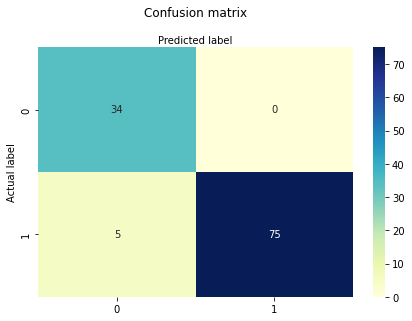

In [28]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
# PROBLEM 3 - PART 2

In [46]:
w = {1:99, 0:1}
classifier = LogisticRegression(class_weight=w, penalty='l1', solver='liblinear', random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(class_weight={0: 1, 1: 99}, penalty='l1', random_state=0,
                   solver='liblinear')

In [47]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1., 1., 0., 0., 1., 1., 1., 1., 1.])

In [48]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[33,  1],
       [ 0, 80]], dtype=int64)

In [49]:
accuracyP3_2 = metrics.accuracy_score(Y_test, Y_pred)
precisionP3_2 = metrics.precision_score(Y_test, Y_pred)
recallP3_2 = metrics.recall_score(Y_test, Y_pred)
    
print("AccuracyP3_2:", accuracyP3_2)
print("PrecisionP3_2:", precisionP3_2)
print("RecallP3_2:",recallP3_2)

AccuracyP3_2: 0.9912280701754386
PrecisionP3_2: 0.9876543209876543
RecallP3_2: 1.0


Text(0.5, 257.44, 'Predicted label')

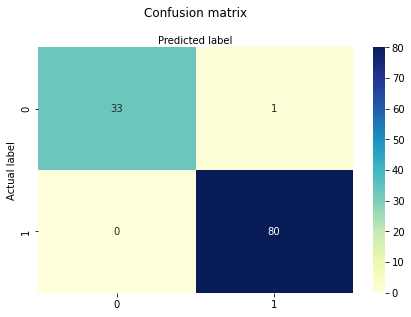

In [34]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
# PROBLEM 4 - PART 1

In [51]:
classifier3 = LogisticRegression()
validationMetrics = {'accuracy': "accuracy"}

# K=5
cv_results = cross_validate(classifier2, X, Y, cv = 5, groups = None, scoring = validationMetrics)
cv_results

#Scores for k-fold with k=5
print("K-fold with k=5")
print()
#Comparing results with Problem 3_1
print("Accuracy for Problem 3_1 = ", accuracyP3, "vs \nAccuracy for Problem 4_1 = ", np.mean(cv_results['test_accuracy']))

K-fold with k=5

Accuracy for Problem 3_1 =  0.956140350877193 vs 
Accuracy for Problem 4_1 =  0.935010091600683


In [37]:
classifier3 = LogisticRegression()
validationMetrics = {'accuracy': "accuracy"}

# K=10
cv_results = cross_validate(classifier2, X, Y, cv = 10, groups = None, scoring = validationMetrics)
cv_results

#Scores for k-fold with k=10
print("K-fold with k=10")
print()
#Comparing results with Problem 3_1
print("Accuracy for Problem 3_1 = ", accuracyP3, "vs \nAccuracy for Problem 4_1 = ", np.mean(cv_results['test_accuracy']))

K-fold with k=10

Accuracy for Problem 3_1 =  0.956140350877193 vs 
Accuracy for Problem 4_1 =  0.9437969924812029


In [38]:
# PROBLEM 4 - PART 2 (With Weights)

In [41]:
w = {1:99, 0:1}

classifier3 = LogisticRegression(class_weight=w, penalty='l1', solver='liblinear', random_state=0)
validationMetrics = {'accuracy': "accuracy"}

# K=5
cv_results = cross_validate(classifier2, X, Y, cv = 5, groups = None, scoring = validationMetrics)
cv_results

#Scores for k-fold with k=5
print("K-fold with k=5")
print()
#Comparing results with Problem 3_2
print("Accuracy for Problem 3_2 = ", accuracyP3_2, "vs \nAccuracy for Problem 4_2 = ", np.mean(cv_results['test_accuracy']))

K-fold with k=5

Accuracy for Problem 3_2 =  0.9912280701754386 vs 
Accuracy for Problem 4_2 =  0.935010091600683


In [42]:
classifier3 = LogisticRegression(class_weight = w)
validationMetrics = {'accuracy': "accuracy"}

# K=5
cv_results = cross_validate(classifier2, X, Y, cv = 10, groups = None, scoring = validationMetrics)
cv_results

#Scores for k-fold with k=10
print("K-fold with k=10")
print()
#Comparing results with Problem 3_2
print("Accuracy for Problem 3_2 = ", accuracyP3_2, "vs \nAccuracy for Problem 4_2 = ", np.mean(cv_results['test_accuracy']))

K-fold with k=10

Accuracy for Problem 3_2 =  0.9912280701754386 vs 
Accuracy for Problem 4_2 =  0.9437969924812029
